#  End to End multi class dog breed classification
This notebook builds and model to identify the breed  of the dog.

## 1. Problem
Identifying the breed of the dog diven an image of the dog
## 2. Data
The data used in this project is taken from Kaggle's dog breed identification competition.
## 3. Evaluation
The evaluation is a file with prediction probablities for each dog breed of each test image.
## 4. Feature
Some information about the data:
* We are dealing with images so it is probably best we use deep learning/transfer learning .
*There are 120 breeds of the dogs.
*There are around 10,000+ images in the both training and test set.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the data available in the drive an save it there for the our use.
#!unzip "drive/My Drive/Dog vision project/dog-breed-identification" -d "drive/My Drive/Dog vision project/"

  ## **Getting our the workspace ready.**

In [ ]:
# Import Tensorflow into colab
import tensorflow as tf
print("TF Version" , tf.__version__)


TF Version 2.8.2


In [ ]:
import os
import pandas as pd
from IPython.display import Image
%load_ext tensorboard
from tensorflow._api.v2.config import optimizer
import matplotlib.pyplot as plt
%matplotlib inline

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Import TensorFlow Hub
import tensorflow_hub as hub
print("TF Hub Version ", hub.__version__)

TF Hub Version  0.12.0


In [ ]:
# Check For GPU Availability
print("GPU"," AVAILABLE  " if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU  AVAILABLE  


## Start the loading the data (Turning it into Tensors)
With all machinw learnig models ,our data has to be in numerical format. So We have to convert our data into numerical formats



In [ ]:
# Checkout the labels of our data
import pandas as pd
lables_csv= pd.read_csv("drive/MyDrive/Dog vision project/labels.csv")
print(lables_csv.describe())
print(lables_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


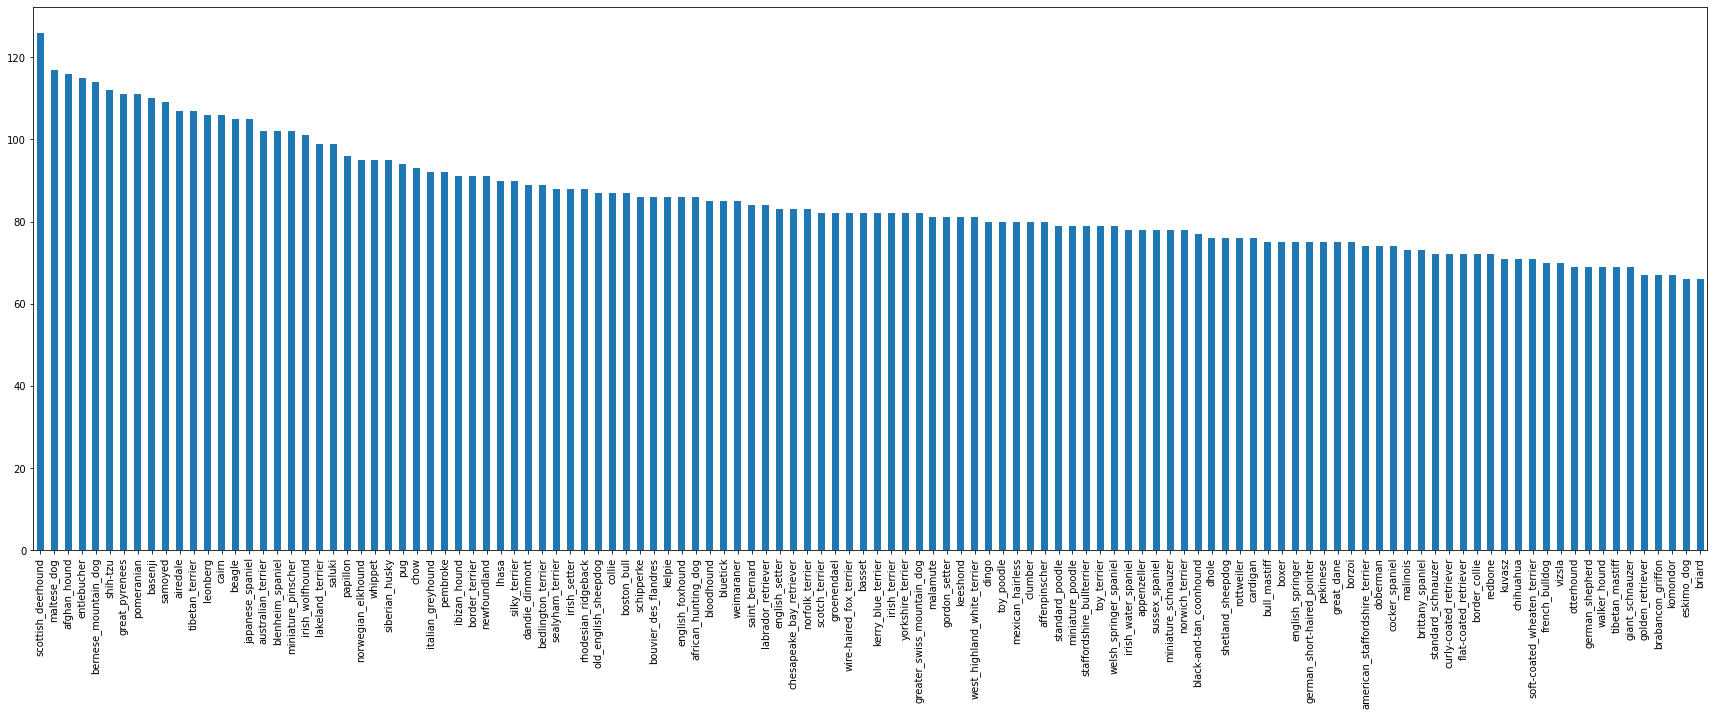

In [ ]:
# Plot the numbers of the dogs of each breed
lables_csv["breed"].value_counts().plot.bar(figsize=(30,10))

### Getting the iamges nd their labels.

In [ ]:
# Create pathnames from image ID's
filename=["drive/MyDrive/Dog vision project/train/" + fname +".jpg" for fname in lables_csv["id"]]
filename[:10]

['drive/MyDrive/Dog vision project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog vision project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog vision project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog vision project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog vision project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog vision project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog vision project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog vision project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog vision project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image file
import os
if len(os.listdir("drive/MyDrive/Dog vision project/train/"))== len(filename):
  print("Filename matches actual amount of files . You can proceed.")
else:
  print("Filename length doesn't matches the actual file length in train folder .Recheck your above code.")

Filename matches actual amount of files . You can proceed.


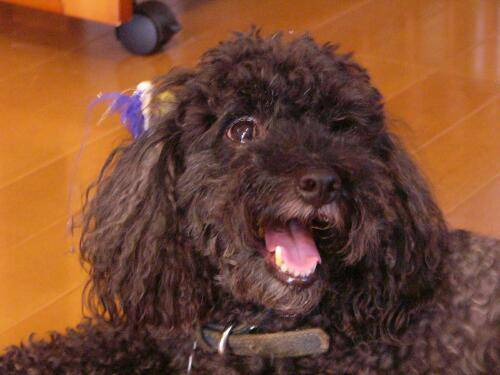

In [ ]:
# One more check
from IPython.display import Image
Image(filename[9406])

In [ ]:
lables_csv['breed'][9406]

'toy_poodle'

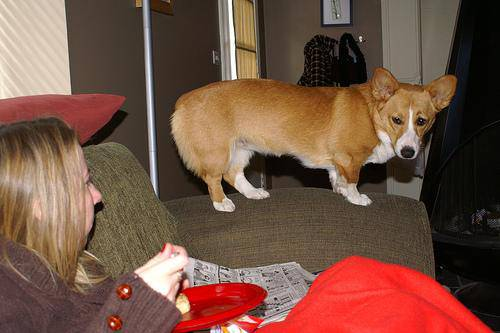

In [ ]:
Image(filename[10000])

In [ ]:
lables_csv['breed'][10000]

'pembroke'

### Converting the data into numeric forms
* First prepare our labels.


In [ ]:
import numpy as np
labels=lables_csv["breed"].to_numpy()
# labels=np.array(lables_csv['breed']) do the same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# check if number of labels matches the number of filename
if len(labels)== len(filename):
  print("You are on the right way")
else:
  print("check the previous code")

NameError: ignored

In [ ]:
# Now the find the numbers of unique breed in the lables
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn the labels into booleans 
boolean_labels=[label==unique_breeds for label in labels  ]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example of turning the boolean lables into integer 0 and 1
print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
#checking for the right data
filename[:10]

['drive/MyDrive/Dog vision project/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog vision project/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog vision project/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog vision project/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog vision project/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog vision project/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog vision project/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog vision project/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog vision project/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog vision project/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Creating our own validation set.
* Since the dataset from the kaggle has  no validation set.

In [ ]:
# Set up the x and y variables
x=filename
y= boolean_labels

In [ ]:
# set number of images to use for experimenting 
num_img = 1000 #@param {type:"slider", min:1000, max:10422, step:1000}


In [ ]:
#Let's split the data into two different sets
from sklearn.model_selection import train_test_split

x_train, x_val,y_train,y_val= train_test_split(x[:num_img],
                                                y[:num_img],
                                                test_size=0.20,
                                                random_state=42)

# **Preprocessing images i.e turning images into tensors**
* We will do it in five steps:
** Take an image filepath as input
** Use Tensorflow to read the file and save it to a variable `image`.
** Turn the `image` (a jpg) into tensors.
** Resize the `image` to be in constant shape.
** Return the modified `image`.

In [ ]:
# Small tutorial for building the function.
from matplotlib.pyplot import imread
image = imread(filename[11])
image.shape

(343, 402, 3)

In [ ]:
tensor=tf.constant(image)[:2]

In [ ]:
# Define image size
img_size=224 ## Take the size on which the model is trained which you are going to implent further

# Create a function for preprocessing the images
def process_images(image_path,IMG_SIZE= img_size):
  """
  Takes the image file with given path name and convert it into tensors
  """
  # Read the image path and store it into a variable
  image = tf.io.read_file(image_path) 
  #Turn the jpeg image into numerical Tensor with # colour channels RGB
  image = tf.image.decode_jpeg(image,channels=3)
  #Convert the colour channel value from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, dtype=tf.float32)
  #Resize the image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

# Turning our data into batches
 This is done to assure the system has enough of memory to fit the data.
  Let's say if we try to process the 10000+ data in one go... they all might not fit into the memory.
  

In [ ]:
# Create a function to return a tuple (image, label)
def image_label(image_path,label):
  """
  Return the imagename with its label
  """
  image= process_images(image_path)
  labels = label   # convert the label into tensors

  return (image,labels)

In [ ]:
# Define batch size
BATCH_SIZE = 32

# Create a function for turning the data into batches
def create_batches(x,y=None, valid_data= False , test_data= False , batch_size= BATCH_SIZE):

  """
  Create batches of data out of images(X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """

  # If the data is a test dataset , we have probably no levels.
  if test_data :
    print("Creating test data batches... ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset , we don't need to shuffle it
  elif valid_data :
    print("Creating the validation data batches.... ")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data_batch = data.map(image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is a train dataset 
  else:
    print("Creating training data batches... ")
    #Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    #shuffling the data brfore mapping image processor function work so that machine doesn't copy the pattern of the data

    data_batch = data.map(image_label).batch(BATCH_SIZE)
    return data_batch


In [ ]:
train_data = create_batches(x_train,y_train)

Creating training data batches... 


In [ ]:
valid_data = create_batches(x_val,y_val,valid_data=True)

Creating the validation data batches.... 


# **Visualizing our data batches**


In [ ]:
import matplotlib.pyplot as plt
# Create a function for viewing images in a data batch
def show_batch_images(images , labels):
  """
  Displays a plot of 32 images (batch size ) and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
   
  #Loop through 32 for diplaying the images
  for i in range(32):
    ax= plt.subplot(8, 4 , i+1)
    plt.imshow(images[i])  # Show the images 
    plt.title(unique_breeds[labels[i].argmax()]) # show the name of the breed of the dog shown in the image
    plt.axis("off")  # To remove the markdown of the axis and make the graph clear



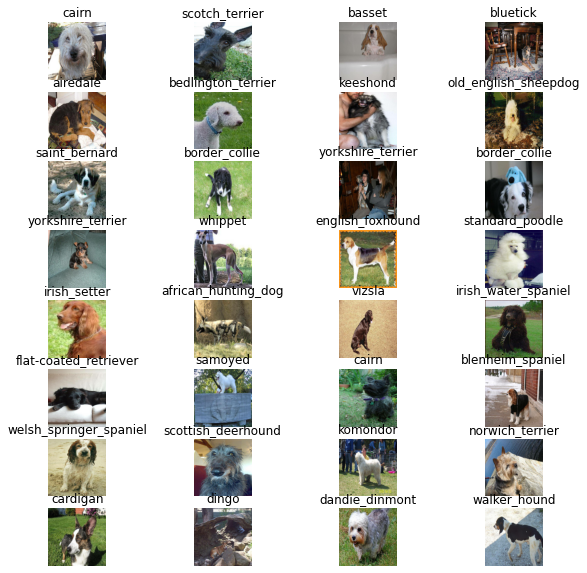

In [ ]:
# Now let's visualise our data with above function
val_images, val_labels = next(valid_data.as_numpy_iterator())
show_batch_images(val_images,val_labels)



# Building  a model
Before we build a model , there are few things we need to define:
* The input shape to our model.
* The output shape of our model.
* The URL of the model we want to use



In [ ]:
train_data.element_spec , len(unique_breeds)

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 120)

In [ ]:
# Shaping the input
INPUT = [None,img_size,img_size, 3] # From the shape of train data
# Shaping the output
OUTPUT = len(unique_breeds) 

# Setup the model URL
MODEL = "https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/5" ## Model Taken from tensor flow hub it is a mobilenetv2 model version 5

Now we have ot our inputs , outputs and model url we are going to build the model using keras.
* Take the input shape, outut shape , and the model we have choosen as parameters.
* Defines the layers in a keras model in sequenial fashion.
* Compiles the model.
* Builds the model
* Returns the model.


In [ ]:
from tensorflow._api.v2.config import optimizer
#Create a function which builds a Keras model.
def create_model(input_shape= INPUT, output_shape= OUTPUT, model_url= MODEL):
  """
  Builds the model using keras deep learning model and the url selected for the model.
  """
  print("Building the model",model_url)

  #Setup the model layers
  model= tf.keras.Sequential([
                    hub.KerasLayer(model_url), # Layer 1 input layer
                    tf.keras.layers.Dense(units=output_shape,
                                          activation="softmax") # Layer 2 output layer
  ])

  # compile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )


  # Build the model
  model.build(input_shape)


  return model

In [ ]:
model= create_model()
model.summary()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 1,812,729
Trainable params: 120,240
Non-trainable params: 1,692,489
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress , check its progress or to stop training early if our model is not improving.
We will create two callbacks , one for the TensorBoard which helps in tracking our model progress and another which prevents our model fro training too long.

### Tensorboard Callback
To setup a `TensorBoard` callback , there are three steps:
1. Load the TensorBoard notebook extension
2. Create a Tensorboard callback which is able to save logs to a directory and pass it to our model `fit()` function.
3. Visualize our models training logs with tensorboard magic function.

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():

  # Create  a log directory for storing the TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog vision project/logs",
                        # Make it so the logs get tracked whenever we run the experiment
                        datetime.datetime.now().strftime("%Y%m%d - %H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback
Early stopping helps to stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

In [ ]:
# Training a model
NUM_EPOCHS = 100 #@param {type:"slider", min:0, max:100, step:10}

In [ ]:
# Check whether GPU is availale or not
print("GPU ","Available !!!!" if tf.config.list_physical_devices("GPU") else "not available")

GPU  Available !!!!


Now we create a function which trains our model.
* Create a model using `create_model()`.
* Setup a Tensorboard callback using `create_tensorboard_callback`.
* Call the `fit` fuction on model passing it the training and validation set of the data.
* Return the model that is trained

In [ ]:
# Function to train the model
def train_model():
  """
  Trains the model and  returns the trained model
  """
  #create the model
  model= create_model()

  # Create the new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            callbacks=[early_stopping,tensorboard],
            validation_data=valid_data,
            validation_freq=1)
  
  # Return the model
  return model



In [ ]:
# FIt the model to our own data and train it using functions we have defined above
model= train_model()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/5
Epoch 1/100
25/25 [==============================] - 196s 7s/step - loss: 5.1649 - accuracy: 0.0750 - val_loss: 4.2014 - val_accuracy: 0.1350
Epoch 2/100
25/25 [==============================] - 4s 160ms/step - loss: 1.8172 - accuracy: 0.5950 - val_loss: 3.2123 - val_accuracy: 0.2700
Epoch 3/100
25/25 [==============================] - 6s 219ms/step - loss: 0.7551 - accuracy: 0.8850 - val_loss: 2.8922 - val_accuracy: 0.3250
Epoch 4/100
25/25 [==============================] - 5s 198ms/step - loss: 0.3539 - accuracy: 0.9887 - val_loss: 2.8100 - val_accuracy: 0.3100
Epoch 5/100
25/25 [==============================] - 5s 219ms/step - loss: 0.2013 - accuracy: 0.9950 - val_loss: 2.7837 - val_accuracy: 0.3200
Epoch 6/100
25/25 [==============================] - 4s 144ms/step - loss: 0.1341 - accuracy: 1.0000 - val_loss: 2.7708 - val_accuracy: 0.3200


# Checking the Tensorboard logs


In [ ]:
%tensorboard --logdir drive/MyDrive/Dog\ vision\ project/logs

<IPython.core.display.Javascript object>

# Making predictions on the validation set of the data using the trained model


In [ ]:
predictions = model.predict(valid_data, verbose = 1)
predictions

7/7 [==============================] - 2s 144ms/step


array([[6.49474678e-04, 1.08259851e-02, 1.02461097e-04, ...,
        1.60597672e-04, 2.47619506e-02, 2.97787483e-03],
       [3.32101504e-03, 3.04991438e-04, 3.68928490e-03, ...,
        1.17855794e-04, 5.45023649e-04, 2.12124065e-02],
       [1.04490879e-04, 6.93365117e-04, 1.51816794e-05, ...,
        6.17700815e-02, 6.99253287e-04, 4.19030972e-02],
       ...,
       [3.96423784e-05, 1.31061533e-04, 2.37929588e-03, ...,
        1.20091077e-03, 8.87184171e-04, 3.06084636e-03],
       [1.38893048e-03, 5.89638716e-04, 1.98415626e-04, ...,
        4.56935377e-04, 1.38771092e-03, 1.06250984e-03],
       [1.37411000e-04, 4.79243929e-03, 2.54281185e-04, ...,
        2.20166869e-03, 1.40034745e-03, 2.47414690e-03]], dtype=float32)

In [ ]:
predictions[0].max()

0.1725368

In [ ]:
predictions[0].sum()

1.0

In [ ]:
# First predictions
index  = [100]
print("MAx  value of the prediction " , {np.max(predictions[index])})
print("Sum of all the value is  ",predictions[index].sum())
print("Max index ",predictions[index].argmax())
print("Predicted index label : ",unique_breeds[predictions[index].argmax()])

MAx  value of the prediction  {0.29816055}
Sum of all the value is   1.0
Max index  89
Predicted index label :  redbone


In [ ]:
# Turn the prediction probablities intom their respective label
def get_pred_label(prediction_probablities):
  """
  Turn the array of the predicted value in the name of the breeds corresponding to the argmax value of that index.
  """
  return unique_breeds[prediction_probablities.argmax()]

In [ ]:
# checking the other functions
get_pred_label(predictions[90])

'english_foxhound'

In [ ]:
#Function for the unbatching of the dataset.
def unbatchify(data):
  """
  Take a batched dataset of (image,label) Tensors and return separate arrays
  """
  images = []
  labels = []
  #loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[label.argmax()])

  return images, labels

In [ ]:
 val_image, val_label = unbatchify(valid_data)
 val_image[0], val_label[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
valid_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
 # Function to plot the image of the predicted and to check its correctivity
 def plot_pred(prediction_prob,labels , images,n=1):
   """
   View the predction, ground truth, and image for sample n
   """
   pred_prob = get_pred_label(prediction_prob[n])
   truth_label = labels[n]
   images = images[n]

   #plot the images and remove the ticks to make it visualisable
   plt.imshow(images)
   plt.xticks([])
   plt.yticks([])

   # To make it more interactive we will set the colour of the title red  if wrong  and green if it is true
   if pred_prob == truth_label :
     colour = 'Green'
   else:
     colour= 'Red'


   #Change the title of the graph and max it more visualisable
   plt.title("{}  {:2.0f}  {}".format(pred_prob,prediction_prob.max()*100,truth_label),color= colour)

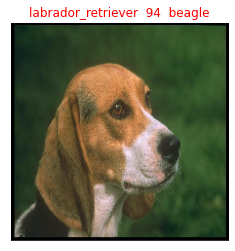

In [ ]:
plot_pred(predictions,val_label,val_image,n=120)

In [ ]:
# Function for plotting the top 10 predition of our model for an image
def plot_10_pred(prediction_prob,truth_label =None,n=1):
  """
  Plot the top 10 highest prediction confidences along with the truth label for sample n
  """
  pred_prob = prediction_prob[n]
  #get the predicted label
  pred_label = get_pred_label(prediction_prob[n])

  # Find the top ten predictions confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  
  # Find the top ten prediction confidence value
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 predictions labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = "Blue")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  #Change  the colour of the label to green if truth label 
  if np.isin(truth_label[n], top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == truth_label[n])].set_color("green")
  else :
    pass

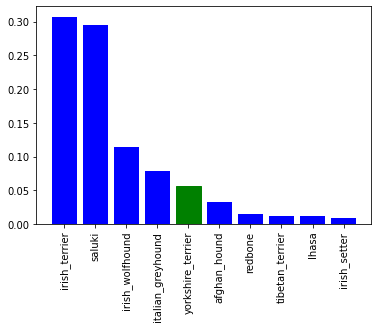

In [ ]:
plot_10_pred(predictions,val_label, n = 10)

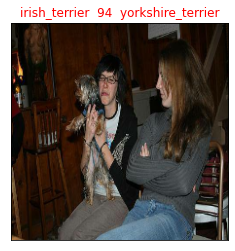

In [ ]:
plot_pred(predictions,val_label,val_image,n=10)

In [ ]:
top_10_pred_indexes = predictions[0].argsort()[102:]
top_10_pred_indexes

array([106,  52,  73, 100,  98,  77,  23,  76, 118, 103, 109,  26,  68,
        65,  59,  35,  70,  82])

In [ ]:
top_10_pred_indexes = predictions[0].argsort()
top_10_pred_indexes

array([ 27,  19,  43,  13,  84,  44, 104,  37,  53,  21,  41,   7,  86,
        75,  42,  69,  63,  39,  55,  16,  51,  45,  46, 115,  34,  71,
       102,  95,  38,  36,  64,  99,   8,   2, 101,  24,  11,  22,   9,
       117,  67,  74,  47,  12,  91,  90,  87,  60,  92,  14,  50,  28,
       111,  61,  25,  85, 112,  93,  30, 107,  29,  18,  72, 113,  54,
        80,  56,  81,   0,  94,  31,  88,   3,  49,  15,   4,  89,   5,
        83,  96, 114,  32, 108, 110,  33, 119,  40,  97,  66,  62, 116,
        79,  20,   6,  48,  78,  17,  10, 105,  58,  57,   1, 106,  52,
        73, 100,  98,  77,  23,  76, 118, 103, 109,  26,  68,  65,  59,
        35,  70,  82])

In [ ]:
len(predictions[0])

120

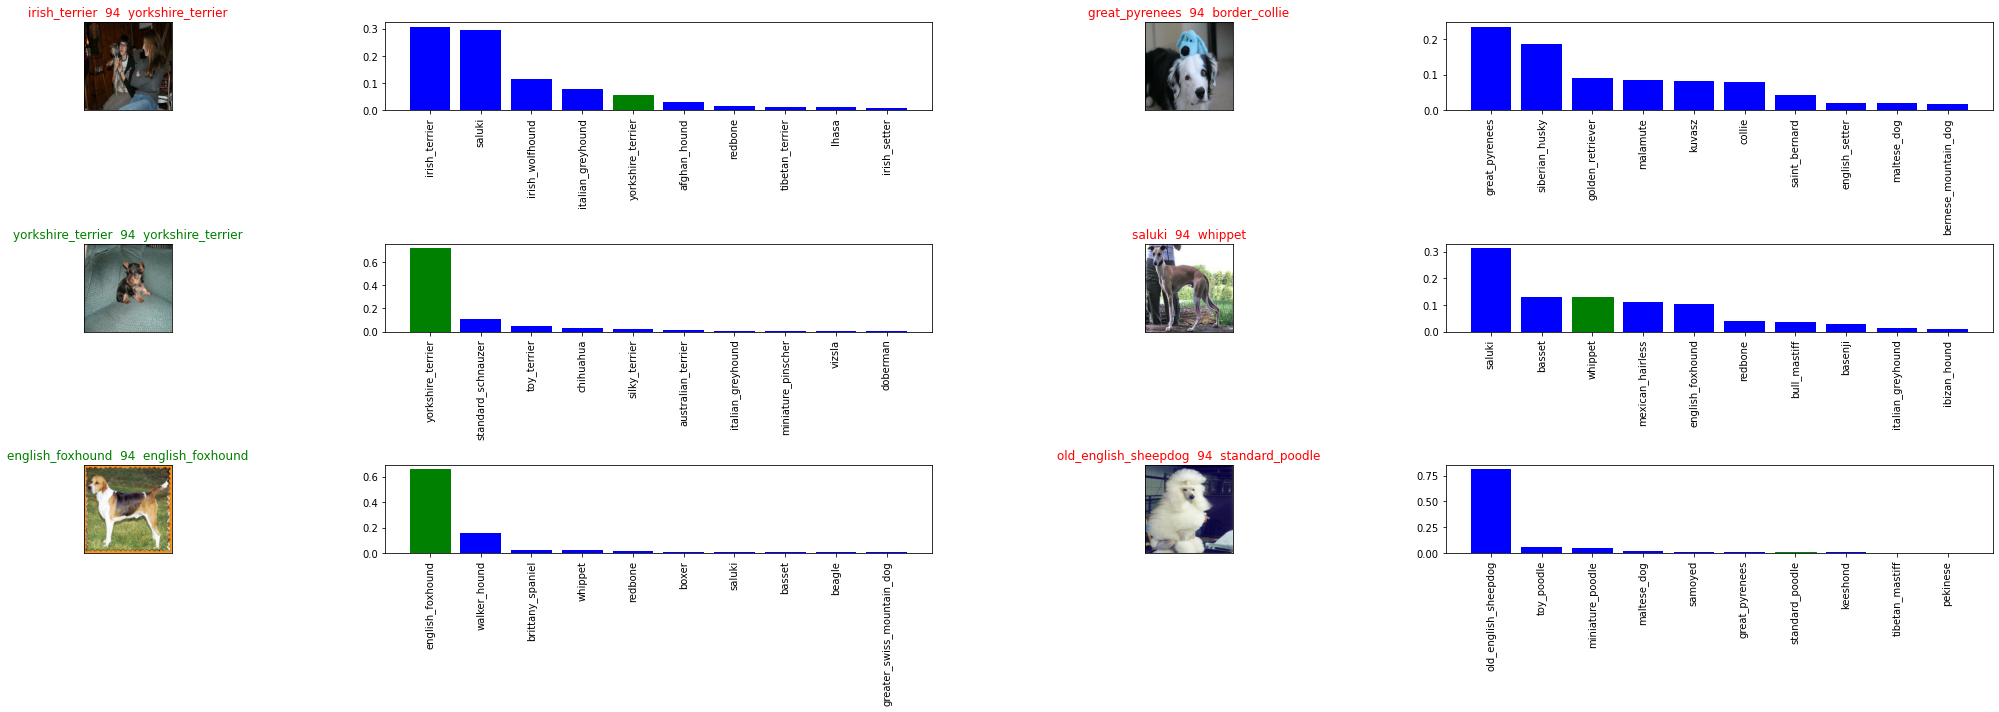

In [ ]:
# Let's checkout a few predictions and their predicting value
multiplier = 10
num_rows= 3
num_cols = 2
num_images =  num_rows * num_cols
plt.figure(figsize=(10*num_rows,5*num_cols))

for i in range(num_images):
  plt.subplot(num_rows , 2*num_cols, 2*i+1)
  plot_pred(predictions,
            val_label,
            val_image,
            n=i+multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_10_pred(predictions,
               val_label,
               n = i + multiplier )


plt.tight_layout(h_pad = 1.0)
plt.show()

# Save and load the model

In [ ]:
# Function for saving the model
def save_model(model, suffix):
  """
  Save a given model in model directory and appends a suffix(string). Also return the path of the model.
  """
  #Create a model directory pathname with current time and date
  modeldir = os.path.join("drive/MyDrive/Dog vision project/models", 
                          datetime.datetime.now().strftime("%Y%m%d -- %H%M%S"))
  model_path  = modeldir + '-'+ suffix + ".h5" # Save the model in ,h5 format (format specified for saving the ml model)
  print("Saving the model . Your model path is : ",model_path)

  model.save(model_path)
  print("Congratulations! your model is saved.")
  
  return model_path


In [ ]:
# Function for loading the saved model.
def load_model(model_path):
  """
  Loads the model from the given path.
  """
  print("Loading the model  from ...." ,model_path)
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer" : hub.KerasLayer} )
  
  return model


In [ ]:
model_export = save_model(model ,"1000_image_trained model_" )

Saving the model . Your model path is :  drive/MyDrive/Dog vision project/models/20220827 -- 142057-1000_image_trained model_.h5
Congratulations! your model is saved.


In [ ]:
model_import = load_model(model_export)

Loading the model  from .... drive/MyDrive/Dog vision project/models/20220827 -- 142057-1000_image_trained model_.h5


# Full data model .
* Create the full data data_batch.
* Create the model on the full data using `create_model()`.
* Create the full model callbacks .
* Fit the full model.
* Train the full data model using `train_model()`.
* Save and reload the model with full model. 

In [ ]:
full_data = create_batches(x,y)

Creating training data batches... 


In [ ]:
full_data_model= create_model()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/classification/5


In [ ]:
# Full data model callbacks
full_data_tensorboard = create_tensorboard_callback()
full_data_EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                           patience = 3)

In [ ]:
full_data_model.fit(x=full_data,
            epochs = NUM_EPOCHS,
            callbacks=[full_data_tensorboard,full_data_EarlyStopping],
           ) 

Epoch 1/100
320/320 [==============================] - ETA: 0s - loss: 2.2342 - accuracy: 0.4454

320/320 [==============================] - 43s 120ms/step - loss: 2.2342 - accuracy: 0.4454
Epoch 2/100
319/320 [============================>.] - ETA: 0s - loss: 1.1222 - accuracy: 0.6763

320/320 [==============================] - 35s 110ms/step - loss: 1.1210 - accuracy: 0.6767
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 0.8311 - accuracy: 0.7544

320/320 [==============================] - 48s 151ms/step - loss: 0.8302 - accuracy: 0.7547
Epoch 4/100
319/320 [============================>.] - ETA: 0s - loss: 0.6399 - accuracy: 0.8185

320/320 [==============================] - 38s 117ms/step - loss: 0.6392 - accuracy: 0.8187
Epoch 5/100
319/320 [============================>.] - ETA: 0s - loss: 0.4989 - accuracy: 0.8726

320/320 [==============================] - 38s 117ms/step - loss: 0.4983 - accuracy: 0.8728
Epoch 6/100
320/320 [==============================] - ETA: 0s - loss: 0.3916 - accuracy: 0.9120

320/320 [==============================] - 47s 147ms/step - loss: 0.3916 - accuracy: 0.9120
Epoch 7/100
320/320 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.9394

320/320 [==============================] - 36s 113ms/step - loss: 0.3086 - accuracy: 0.9394
Epoch 8/100
320/320 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9621

320/320 [==============================] - 36s 112ms/step - loss: 0.2441 - accuracy: 0.9621
Epoch 9/100
319/320 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.9746

320/320 [==============================] - 37s 116ms/step - loss: 0.1943 - accuracy: 0.9747
Epoch 10/100
319/320 [============================>.] - ETA: 0s - loss: 0.1558 - accuracy: 0.9848

320/320 [==============================] - 35s 111ms/step - loss: 0.1556 - accuracy: 0.9848
Epoch 11/100
320/320 [==============================] - ETA: 0s - loss: 0.1259 - accuracy: 0.9903

320/320 [==============================] - 36s 111ms/step - loss: 0.1259 - accuracy: 0.9903
Epoch 12/100
320/320 [==============================] - ETA: 0s - loss: 0.1030 - accuracy: 0.9948

320/320 [==============================] - 36s 112ms/step - loss: 0.1030 - accuracy: 0.9948
Epoch 13/100
319/320 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9963

320/320 [==============================] - 34s 106ms/step - loss: 0.0853 - accuracy: 0.9963
Epoch 14/100
320/320 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9976

320/320 [==============================] - 36s 112ms/step - loss: 0.0717 - accuracy: 0.9976
Epoch 15/100
319/320 [============================>.] - ETA: 0s - loss: 0.0612 - accuracy: 0.9981

320/320 [==============================] - 36s 111ms/step - loss: 0.0611 - accuracy: 0.9981
Epoch 16/100
320/320 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9986

320/320 [==============================] - 36s 112ms/step - loss: 0.0528 - accuracy: 0.9986
Epoch 17/100
320/320 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9987

320/320 [==============================] - 35s 111ms/step - loss: 0.0461 - accuracy: 0.9987
Epoch 18/100
320/320 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0408 - accuracy: 0.9988
Epoch 19/100
320/320 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0365 - accuracy: 0.9988
Epoch 20/100
319/320 [============================>.] - ETA: 0s - loss: 0.0330 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0329 - accuracy: 0.9988
Epoch 21/100
320/320 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0300 - accuracy: 0.9988
Epoch 22/100
320/320 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9988

320/320 [==============================] - 35s 111ms/step - loss: 0.0275 - accuracy: 0.9988
Epoch 23/100
319/320 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9988

320/320 [==============================] - 35s 108ms/step - loss: 0.0255 - accuracy: 0.9988
Epoch 24/100
320/320 [==============================] - ETA: 0s - loss: 0.0237 - accuracy: 0.9988

320/320 [==============================] - 35s 108ms/step - loss: 0.0237 - accuracy: 0.9988
Epoch 25/100
320/320 [==============================] - ETA: 0s - loss: 0.0222 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0222 - accuracy: 0.9988
Epoch 26/100
319/320 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9988

320/320 [==============================] - 33s 104ms/step - loss: 0.0209 - accuracy: 0.9988
Epoch 27/100
319/320 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0197 - accuracy: 0.9988
Epoch 28/100
320/320 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0188 - accuracy: 0.9988
Epoch 29/100
319/320 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0180 - accuracy: 0.9988
Epoch 30/100
319/320 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9988

320/320 [==============================] - 34s 106ms/step - loss: 0.0173 - accuracy: 0.9988
Epoch 31/100
320/320 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9988

320/320 [==============================] - 32s 100ms/step - loss: 0.0167 - accuracy: 0.9988
Epoch 32/100
320/320 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9988

320/320 [==============================] - 34s 108ms/step - loss: 0.0162 - accuracy: 0.9988
Epoch 33/100
319/320 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0157 - accuracy: 0.9988
Epoch 34/100
320/320 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9988

320/320 [==============================] - 33s 102ms/step - loss: 0.0153 - accuracy: 0.9988
Epoch 35/100
320/320 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0150 - accuracy: 0.9988
Epoch 36/100
320/320 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9988

320/320 [==============================] - 36s 112ms/step - loss: 0.0147 - accuracy: 0.9988
Epoch 37/100
320/320 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0144 - accuracy: 0.9988
Epoch 38/100
320/320 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 39/100
319/320 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0140 - accuracy: 0.9988
Epoch 40/100
320/320 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0138 - accuracy: 0.9988
Epoch 41/100
320/320 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9988

320/320 [==============================] - 35s 111ms/step - loss: 0.0137 - accuracy: 0.9988
Epoch 42/100
319/320 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0135 - accuracy: 0.9988
Epoch 43/100
320/320 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9988

320/320 [==============================] - 35s 108ms/step - loss: 0.0134 - accuracy: 0.9988
Epoch 44/100
319/320 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9988

320/320 [==============================] - 36s 112ms/step - loss: 0.0133 - accuracy: 0.9988
Epoch 45/100
320/320 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0132 - accuracy: 0.9988
Epoch 46/100
320/320 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0131 - accuracy: 0.9988
Epoch 47/100
319/320 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9988

320/320 [==============================] - 34s 108ms/step - loss: 0.0130 - accuracy: 0.9988
Epoch 48/100
319/320 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0129 - accuracy: 0.9988
Epoch 49/100
319/320 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0129 - accuracy: 0.9988
Epoch 50/100
319/320 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0128 - accuracy: 0.9988
Epoch 51/100
320/320 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9988

320/320 [==============================] - 36s 111ms/step - loss: 0.0127 - accuracy: 0.9988
Epoch 52/100
319/320 [============================>.] - ETA: 0s - loss: 0.0127 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0127 - accuracy: 0.9988
Epoch 53/100
320/320 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9988

320/320 [==============================] - 35s 111ms/step - loss: 0.0126 - accuracy: 0.9988
Epoch 54/100
320/320 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9988

320/320 [==============================] - 33s 104ms/step - loss: 0.0126 - accuracy: 0.9988
Epoch 55/100
320/320 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9988

320/320 [==============================] - 33s 102ms/step - loss: 0.0126 - accuracy: 0.9988
Epoch 56/100
319/320 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 57/100
319/320 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9988

320/320 [==============================] - 33s 103ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 58/100
320/320 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 59/100
320/320 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9988

320/320 [==============================] - 33s 102ms/step - loss: 0.0125 - accuracy: 0.9988
Epoch 60/100
320/320 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 103ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 61/100
320/320 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 103ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 62/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 102ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 63/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 104ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 64/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 105ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 65/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 33s 104ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 66/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0124 - accuracy: 0.9988
Epoch 67/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 34s 105ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 68/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 34s 106ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 69/100
319/320 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9988

320/320 [==============================] - 34s 107ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 70/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 32s 101ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 71/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 72/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 73/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 74/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 106ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 75/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 108ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 76/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 105ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 77/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 78/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 79/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 80/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 81/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 82/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 108ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 83/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 110ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 84/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 85/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 35s 109ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 86/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 106ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 87/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 33s 104ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 88/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 105ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 89/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 34s 106ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 90/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 96ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 91/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 96ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 92/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 32s 98ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 93/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 96ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 94/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 97ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 95/100
320/320 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 97ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 96/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 98ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 97/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 31s 97ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 98/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 32s 99ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 99/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 32s 99ms/step - loss: 0.0123 - accuracy: 0.9988
Epoch 100/100
319/320 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9988

320/320 [==============================] - 32s 101ms/step - loss: 0.0123 - accuracy: 0.9988


In [ ]:
len(full_data)

In [ ]:
full_model_path = save_model(full_data_model,"full_data_model_")

In [ ]:
load_full_data_model = load_model('/content/drive/MyDrive/Dog vision project/models/20220827 -- 171122-full_data_model_.h5')

Loading the model  from .... /content/drive/MyDrive/Dog vision project/models/20220827 -- 171122-full_data_model_.h5


#Making prediction on test dataset

In [ ]:
# Load the test dataset
test_path  = "drive/MyDrive/Dog vision project/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

In [ ]:
test_filenames[:10]

['drive/MyDrive/Dog vision project/test/e3d417026b89cbb57b00a7208421009d.jpg',
 'drive/MyDrive/Dog vision project/test/e12731c30619c3fa4b0d9d9a76fb9d60.jpg',
 'drive/MyDrive/Dog vision project/test/e458d6133dd1b436b047f86910f7fe34.jpg',
 'drive/MyDrive/Dog vision project/test/dea92807aa2ac37bbc2dabf1b0eb6a39.jpg',
 'drive/MyDrive/Dog vision project/test/dccf2e91f79396055e7ff83f1f207fbc.jpg',
 'drive/MyDrive/Dog vision project/test/df577444ba8b7733f42c49e9d42111a9.jpg',
 'drive/MyDrive/Dog vision project/test/e5b8269cbd9b417dd00e8661206b91ff.jpg',
 'drive/MyDrive/Dog vision project/test/e596c0d97b381e876d46dda2eb60074c.jpg',
 'drive/MyDrive/Dog vision project/test/debfa5cad80e35c510dff6ca29b94ca3.jpg',
 'drive/MyDrive/Dog vision project/test/e1b0cbcf3235fe9a7b35c1652081ff8d.jpg']

In [ ]:
test_data = create_batches(test_filenames,test_data= True)

Creating test data batches... 


In [ ]:
test_predictions= load_full_data_model.predict(test_data,
                                               verbose =1)

324/324 [==============================] - 986s 3s/step


In [ ]:
test_predictions


array([[2.17720891e-28, 6.03180700e-13, 3.93980699e-17, ...,
        2.34915874e-13, 1.34019755e-15, 2.53696207e-13],
       [1.46118676e-19, 9.08563322e-07, 2.92570965e-23, ...,
        1.42781500e-04, 2.72607227e-04, 5.84336012e-15],
       [8.48296548e-17, 3.47473515e-13, 1.98884037e-25, ...,
        5.14867740e-23, 1.03297997e-14, 1.92322083e-14],
       ...,
       [3.16542488e-24, 1.31650189e-19, 9.38950356e-20, ...,
        8.33630302e-27, 2.04637928e-18, 1.64092192e-18],
       [1.66341306e-22, 7.27692225e-17, 1.11635754e-23, ...,
        8.26103954e-17, 6.87465413e-19, 1.12305574e-14],
       [1.12918968e-15, 4.74492761e-18, 9.03841515e-21, ...,
        6.08966291e-16, 2.39066298e-06, 2.50494087e-14]], dtype=float32)

In [ ]:
import numpy as np
np.savetxt("drive/MyDrive/Dog vision project/preds_array.csv",test_predictions,delimiter = ",")

In [ ]:
test_predictions = np.loadtxt("drive/MyDrive/Dog vision project/preds_array.csv",delimiter = ',')

In [ ]:
submission_file  = pd.DataFrame(columns = ["id"]+list(unique_breeds))

In [ ]:
submission_file

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_ids =[os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:10]

['e3d417026b89cbb57b00a7208421009d',
 'e12731c30619c3fa4b0d9d9a76fb9d60',
 'e458d6133dd1b436b047f86910f7fe34',
 'dea92807aa2ac37bbc2dabf1b0eb6a39',
 'dccf2e91f79396055e7ff83f1f207fbc',
 'df577444ba8b7733f42c49e9d42111a9',
 'e5b8269cbd9b417dd00e8661206b91ff',
 'e596c0d97b381e876d46dda2eb60074c',
 'debfa5cad80e35c510dff6ca29b94ca3',
 'e1b0cbcf3235fe9a7b35c1652081ff8d']

In [ ]:
submission_file["id"] = test_ids

In [ ]:
submission_file[list(unique_breeds)] = test_predictions

In [ ]:
submission_file

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e3d417026b89cbb57b00a7208421009d,2.177209e-28,6.031807e-13,3.939807e-17,5.626855e-24,1.980028e-21,8.976807e-18,7.232295e-19,8.740151e-23,2.976559e-15,...,2.471573e-15,8.556641e-20,8.249423e-14,3.327648e-11,4.633547e-14,2.912123e-12,1.226864e-15,2.349159e-13,1.340198e-15,2.536962e-13
1,e12731c30619c3fa4b0d9d9a76fb9d60,1.461187e-19,9.085633e-07,2.925710e-23,1.530228e-22,1.851810e-13,4.883282e-10,1.446092e-13,3.665965e-17,1.818263e-13,...,1.172470e-03,2.837081e-15,6.248012e-19,5.944568e-11,1.149777e-19,9.557949e-19,2.607985e-01,1.427815e-04,2.726072e-04,5.843360e-15
2,e458d6133dd1b436b047f86910f7fe34,8.482965e-17,3.474735e-13,1.988840e-25,5.681564e-14,7.906004e-23,0.000000e+00,6.046781e-22,1.089660e-21,1.673349e-31,...,3.971341e-12,9.659919e-31,1.005758e-20,3.094419e-30,5.249655e-34,6.382750e-30,6.205849e-23,5.148677e-23,1.032980e-14,1.923221e-14
3,dea92807aa2ac37bbc2dabf1b0eb6a39,1.216985e-31,1.359566e-26,8.105684e-26,1.174863e-09,6.584503e-32,1.108611e-22,9.839150e-30,3.375362e-31,2.067536e-35,...,3.275520e-17,9.430910e-36,2.970103e-22,7.185532e-21,4.251960e-30,1.528582e-35,5.958168e-38,6.416568e-29,3.777217e-22,4.754123e-25
4,dccf2e91f79396055e7ff83f1f207fbc,1.830571e-14,4.030048e-21,8.207188e-27,2.521253e-24,2.926430e-27,3.711207e-30,5.276946e-14,2.434119e-16,2.383108e-03,...,4.494891e-14,2.353442e-22,1.439759e-10,2.994213e-30,2.001614e-27,4.369646e-18,1.847985e-22,2.019973e-16,3.934801e-21,9.291804e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,07525d1433a6ea0cb8ef07baa6a392bf,8.565319e-19,4.638338e-19,8.904428e-24,8.000971e-29,1.868826e-18,6.714128e-19,9.570273e-24,4.912409e-10,3.243621e-19,...,4.446354e-10,1.362510e-16,2.105716e-21,2.980258e-07,2.492642e-25,1.323493e-26,1.467391e-24,7.014652e-15,3.358759e-08,6.559369e-27
10353,0745215532a68e30976e45ea0389ea61,1.077725e-22,1.725415e-15,1.264302e-30,1.242213e-25,3.846857e-36,2.819645e-27,2.870473e-17,0.000000e+00,3.901113e-25,...,6.477759e-21,3.046263e-35,2.185529e-20,0.000000e+00,3.759575e-31,7.145493e-27,2.906227e-24,1.019010e-25,5.278395e-26,1.039488e-28
10354,0890c992ea2d00c3c2de9e588081a3b9,3.165425e-24,1.316502e-19,9.389504e-20,7.315800e-32,2.877815e-37,1.370148e-32,1.676900e-21,5.297290e-31,2.620020e-30,...,9.698429e-20,2.511648e-28,1.671216e-30,4.638806e-35,8.988689e-36,3.740546e-28,0.000000e+00,8.336303e-27,2.046379e-18,1.640922e-18
10355,075c02a433329d00eb726434d8431efd,1.663413e-22,7.276922e-17,1.116358e-23,5.644758e-21,1.536211e-16,3.140408e-25,3.168461e-23,3.682969e-18,4.045391e-10,...,2.470382e-20,5.932480e-17,2.093452e-10,3.318334e-12,2.509346e-13,7.422659e-01,7.243932e-18,8.261040e-17,6.874654e-19,1.123056e-14


In [ ]:
len(test_filenames)

10357

In [ ]:
submission_file.to_csv("drive/MyDrive/Dog vision project/final_file.csv", index = False)

In [ ]:
submission_file = pd.read_csv("drive/MyDrive/Dog vision project/final_file.csv")

In [ ]:
submission_file

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e3d417026b89cbb57b00a7208421009d,2.177209e-28,6.031807e-13,3.939807e-17,5.626855e-24,1.980028e-21,8.976807e-18,7.232295e-19,8.740151e-23,2.976559e-15,...,2.471573e-15,8.556641e-20,8.249423e-14,3.327648e-11,4.633547e-14,2.912123e-12,1.226864e-15,2.349159e-13,1.340198e-15,2.536962e-13
1,e12731c30619c3fa4b0d9d9a76fb9d60,1.461187e-19,9.085633e-07,2.925710e-23,1.530228e-22,1.851810e-13,4.883282e-10,1.446092e-13,3.665965e-17,1.818263e-13,...,1.172470e-03,2.837081e-15,6.248012e-19,5.944568e-11,1.149777e-19,9.557949e-19,2.607985e-01,1.427815e-04,2.726072e-04,5.843360e-15
2,e458d6133dd1b436b047f86910f7fe34,8.482965e-17,3.474735e-13,1.988840e-25,5.681564e-14,7.906004e-23,0.000000e+00,6.046781e-22,1.089660e-21,1.673349e-31,...,3.971341e-12,9.659919e-31,1.005758e-20,3.094419e-30,5.249655e-34,6.382750e-30,6.205849e-23,5.148677e-23,1.032980e-14,1.923221e-14
3,dea92807aa2ac37bbc2dabf1b0eb6a39,1.216985e-31,1.359566e-26,8.105684e-26,1.174863e-09,6.584503e-32,1.108611e-22,9.839150e-30,3.375362e-31,2.067536e-35,...,3.275520e-17,9.430910e-36,2.970103e-22,7.185532e-21,4.251960e-30,1.528582e-35,5.958168e-38,6.416568e-29,3.777217e-22,4.754123e-25
4,dccf2e91f79396055e7ff83f1f207fbc,1.830571e-14,4.030048e-21,8.207188e-27,2.521253e-24,2.926430e-27,3.711207e-30,5.276946e-14,2.434119e-16,2.383108e-03,...,4.494891e-14,2.353442e-22,1.439759e-10,2.994213e-30,2.001614e-27,4.369646e-18,1.847985e-22,2.019973e-16,3.934801e-21,9.291804e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,07525d1433a6ea0cb8ef07baa6a392bf,8.565319e-19,4.638338e-19,8.904428e-24,8.000971e-29,1.868826e-18,6.714128e-19,9.570273e-24,4.912409e-10,3.243621e-19,...,4.446354e-10,1.362510e-16,2.105716e-21,2.980258e-07,2.492642e-25,1.323493e-26,1.467391e-24,7.014652e-15,3.358759e-08,6.559369e-27
10353,0745215532a68e30976e45ea0389ea61,1.077725e-22,1.725415e-15,1.264302e-30,1.242213e-25,3.846857e-36,2.819645e-27,2.870473e-17,0.000000e+00,3.901113e-25,...,6.477759e-21,3.046263e-35,2.185529e-20,0.000000e+00,3.759575e-31,7.145493e-27,2.906227e-24,1.019010e-25,5.278395e-26,1.039488e-28
10354,0890c992ea2d00c3c2de9e588081a3b9,3.165425e-24,1.316502e-19,9.389504e-20,7.315800e-32,2.877815e-37,1.370148e-32,1.676900e-21,5.297290e-31,2.620020e-30,...,9.698429e-20,2.511648e-28,1.671216e-30,4.638806e-35,8.988689e-36,3.740546e-28,0.000000e+00,8.336303e-27,2.046379e-18,1.640922e-18
10355,075c02a433329d00eb726434d8431efd,1.663413e-22,7.276922e-17,1.116358e-23,5.644758e-21,1.536211e-16,3.140408e-25,3.168461e-23,3.682969e-18,4.045391e-10,...,2.470382e-20,5.932480e-17,2.093452e-10,3.318334e-12,2.509346e-13,7.422659e-01,7.243932e-18,8.261040e-17,6.874654e-19,1.123056e-14


# Custom checking

In [ ]:
custom_path = "drive/MyDrive/Dog vision project/myfile/"
custom_image_paths = [custom_path+ fname for fname in os.listdir(custom_path)]

In [ ]:
test = create_batches(custom_image_paths, test_data = True)

Creating test data batches... 


In [ ]:
test

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
pred = load_full_data_model.predict(test,verbose = 1)

1/1 [==============================] - 0s 112ms/step


In [ ]:
custom_label = get_pred_label(pred[3])
custom_label

'samoyed'